In [4]:
import os
import pandas as pd

In [5]:
df = pd.read_csv("real-estate-sales.csv")

Gerekli kütüphaneleri içe aktarıp ilgili veri setini df isimli dataframe'e kaydettik.

Veri setinin ilk 5 gözlemine hızlıca göz atalım.

In [6]:
df.head()

,PropertyID,xrCompositeLandUseID,xrBuildingTypeID,ParcelID,LocationStartNumber,ApartmentUnitNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,LivingUnits,OwnerLastName,OwnerFirstName,PrimaryGrantor,SaleDate,SalePrice,TotalAppraisedValue,LegalReference,xrSalesValidityID,xrDeedID
0,30,3,4.0,144-698-048,22.0,NaN,BRISTOL ST,2,6000.0,1422.0,1.0,KHAN,BIBI,ALI MUNTAAZ,12/10/2019,0,136600,07559-0116,5,8
1,50,3,4.0,121-698-073,164.0,NaN,HOLLYWOOD AVE,2,5650.0,1384.0,1.0,GONZALEZ,LOURDES,GONZALEZ JOHNETTE,12/18/2019,179900,158400,07561-0225,1,10
2,58,3,6.0,121-699-090,87.0,NaN,BRISTOL ST,2,5850.0,1249.0,1.0,SAMPAYO,YARLIS,FLOYD ANNIE J ESTATE,05/24/2019,174900,144400,07485-0035,12,1
3,66,3,6.0,144-699-037,55.0,NaN,BRISTOL ST,2,5900.0,1390.0,1.0,CARRILLO PACHECO,RICARDO,HARGROVE DAVID L,09/10/2019,140000,142400,07523-0330,1,10
4,78,3,3.0,144-699-025,5.0,NaN,BRISTOL ST,2,7788.0,960.0,1.0,VARJABEDIAN ROSE M (L.U.),NaN,VARJABEDIAN ANTHONY ( L U),05/14/2020,0,147900,07616-0064,11,7


öznitelik veri tiplerini ve eksik gözlem içerip içermediğine bakabiliriz.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 20 columns):
PropertyID                 4735 non-null int64
xrCompositeLandUseID       4735 non-null int64
xrBuildingTypeID           4719 non-null float64
ParcelID                   4735 non-null object
LocationStartNumber        4734 non-null float64
ApartmentUnitNumber        1474 non-null object
StreetNameAndWay           4735 non-null object
xrPrimaryNeighborhoodID    4735 non-null int64
LandSF                     4165 non-null float64
TotalFinishedArea          4536 non-null float64
LivingUnits                4719 non-null float64
OwnerLastName              4734 non-null object
OwnerFirstName             2375 non-null object
PrimaryGrantor             4735 non-null object
SaleDate                   4735 non-null object
SalePrice                  4735 non-null int64
TotalAppraisedValue        4735 non-null int64
LegalReference             4728 non-null object
xrSalesValidityID          47

In [8]:
df.describe()

,PropertyID,xrCompositeLandUseID,xrBuildingTypeID,LocationStartNumber,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,LivingUnits,SalePrice,TotalAppraisedValue,xrSalesValidityID,xrDeedID
count,4735.000000,4735.000000,4719.000000,4734.000000,4735.000000,4.165000e+03,4536.000000,4719.000000,4.735000e+03,4.735000e+03,4735.000000,4735.000000
mean,14535.434002,122.837804,14.827718,215.369455,182.455544,9.110300e+03,4855.434746,2.328671,7.331167e+05,2.309265e+05,12.665681,10.454699
std,8746.004206,184.826804,13.771364,371.406130,152.957357,4.656159e+04,29188.516750,7.786702,2.202405e+06,1.528452e+06,10.279653,4.189835
min,11.000000,3.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,6913.000000,4.000000,6.000000,38.000000,46.000000,0.000000e+00,900.000000,1.000000,0.000000e+00,5.210000e+04,1.000000,8.000000
50%,14332.000000,5.000000,12.000000,98.000000,151.000000,6.140000e+03,1776.000005,1.000000,1.070000e+05,1.320000e+05,11.000000,10.000000
75%,21124.500000,140.000000,16.000000,215.000000,280.000000,7.880000e+03,3508.250000,2.500000,3.050000e+05,1.758000e+05,25.000000,10.000000
max,28862.000000,458.000000,105.000000,3466.000000,496.000000,1.576872e+06,983691.590000,266.000000,7.050000e+07,6.408700e+07,27.000000,22.000000


19 farklı özniteliğe sahip olan verimizde toplam 4735 gözlemimiz var. 
Bazı öznitelik değerlerinde oldukça fazla eksik değer bulunmakta.

Modelimizde etkisi olmayacağını düşündüğümüz öznitelik değerlerini siliyoruz.

In [9]:
df=df.drop(['OwnerLastName', 'OwnerFirstName','PrimaryGrantor','SaleDate','ParcelID','ApartmentUnitNumber','PropertyID','LegalReference','xrSalesValidityID','xrDeedID'], axis=1)

In [10]:
df

,xrCompositeLandUseID,xrBuildingTypeID,LocationStartNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,LivingUnits,SalePrice,TotalAppraisedValue
0,3,4.0,22.0,BRISTOL ST,2,6000.0,1422.00000,1.0,0,136600
1,3,4.0,164.0,HOLLYWOOD AVE,2,5650.0,1384.00000,1.0,179900,158400
2,3,6.0,87.0,BRISTOL ST,2,5850.0,1249.00000,1.0,174900,144400
3,3,6.0,55.0,BRISTOL ST,2,5900.0,1390.00000,1.0,140000,142400
4,3,3.0,5.0,BRISTOL ST,2,7788.0,960.00000,1.0,0,147900
5,3,4.0,237.0,NEWINGTON AVE,2,8100.0,1075.20001,1.0,156750,145000
6,3,5.0,66.0,MARION ST,2,7400.0,1224.00000,1.0,140000,144200
7,3,5.0,66.0,MARION ST,2,7400.0,1224.00000,1.0,127972,144200
8,3,6.0,82.0,MARION ST,2,7050.0,1288.00000,1.0,0,125100
9,3,6.0,82.0,MARION ST,2,7050.0,1288.00000,1.0,107500,125100


"SalePrice" ve "LivingUnits" özniteliklerimizin değer dağılımına bakabiliriz

In [11]:
df["SalePrice"].value_counts()

0          1328
1           300
4550000      97
4325000      92
2135000      91
950000       79
3107547      69
10           58
2380000      55
2292453      54
1975000      44
1872000      40
2660000      36
80000        33
165000       32
1450000      31
8500000      30
1255000      29
150000       28
125000       27
300000       26
250000       26
140000       26
50000        24
1152000      24
190000       23
135000       23
170000       23
120000       22
175000       22
           ... 
142700        1
27651         1
60500         1
38000         1
144501        1
151725        1
68400         1
185500        1
82749         1
93000         1
251000        1
27500         1
134000        1
560000        1
228226        1
74629         1
158600        1
195700        1
68500         1
294000        1
144500        1
109500        1
5815242       1
150500        1
70655         1
633784        1
62475         1
191500        1
101400        1
162000        1
Name: SalePrice, Length:

In [12]:
df["LivingUnits"].value_counts()

1.0      2494
3.0       766
2.0       598
0.0       447
6.0       151
4.0        95
12.0       38
5.0        20
8.0        20
9.0        11
10.0        9
25.0        7
18.0        7
7.0         5
16.0        5
14.0        4
21.0        4
15.0        4
11.0        3
36.0        3
20.0        2
22.0        2
78.0        2
150.0       2
42.0        2
50.0        2
52.0        1
26.0        1
266.0       1
214.0       1
30.0        1
24.0        1
13.0        1
96.0        1
165.0       1
156.0       1
17.0        1
84.0        1
23.0        1
34.0        1
85.0        1
44.0        1
Name: LivingUnits, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 10 columns):
xrCompositeLandUseID       4735 non-null int64
xrBuildingTypeID           4719 non-null float64
LocationStartNumber        4734 non-null float64
StreetNameAndWay           4735 non-null object
xrPrimaryNeighborhoodID    4735 non-null int64
LandSF                     4165 non-null float64
TotalFinishedArea          4536 non-null float64
LivingUnits                4719 non-null float64
SalePrice                  4735 non-null int64
TotalAppraisedValue        4735 non-null int64
dtypes: float64(5), int64(4), object(1)
memory usage: 370.0+ KB


Bazı etkisiz öznitelikleri silsek de hala eksik verilerin olduğunu görebiliyoruz. 

"SalePrice" değerinin 0,1 veya 10 olduğu durumlarda "TotalAppraisedValue" değerine eşitliyoruz ki modelimiz daha doğru çalışsın. 

Aynı şekilde "TotalAppraisedValue" değeri içinde 0,1 veya 10 olan değerleri "SalePrice" değerine eşitliyoruz.

In [14]:
for i in range (len(df)):
    if(df.iloc[i,8]==0):
        df.iloc[i,8]=df.iloc[i,9]
        continue
    if(df.iloc[i,8]==1):
        df.iloc[i,8]=df.iloc[i,9]
        continue
    if(df.iloc[i,8]==10):
        df.iloc[i,8]=df.iloc[i,9]
        continue
    if(df.iloc[i,9]==0):
        df.iloc[i,9]=df.iloc[i,8]
        continue

In [15]:
df["LivingUnits"].value_counts()

1.0      2494
3.0       766
2.0       598
0.0       447
6.0       151
4.0        95
12.0       38
5.0        20
8.0        20
9.0        11
10.0        9
25.0        7
18.0        7
7.0         5
16.0        5
14.0        4
21.0        4
15.0        4
11.0        3
36.0        3
20.0        2
22.0        2
78.0        2
150.0       2
42.0        2
50.0        2
52.0        1
26.0        1
266.0       1
214.0       1
30.0        1
24.0        1
13.0        1
96.0        1
165.0       1
156.0       1
17.0        1
84.0        1
23.0        1
34.0        1
85.0        1
44.0        1
Name: LivingUnits, dtype: int64

bazı sokaklarda çok az adette satış olması durumunun modelimize yeterli veriyi sunmayacağını ve olumlu etki etmeyeceğini düşündüğümüz için bu sokakları da kaldırdık 

In [16]:
df=df.groupby('StreetNameAndWay').filter(lambda x : len(x)>25) 

In [17]:
df["StreetNameAndWay"].value_counts()

LAUREL ST           133
WETHERSFIELD AVE    133
COLLINS ST          111
WILLARD ST          105
BENTON ST           104
EVERGREEN AVE        91
GOLD ST              85
PARK ST              84
MAIN ST              67
BROAD ST             65
WOODLAND ST          63
FRANKLIN AVE         59
SUMNER ST            56
BARBOUR ST           55
HILLSIDE AVE         47
BROOK ST             46
WYLLYS ST            43
EDGEWOOD ST          43
MAPLE AVE            40
HUNTINGTON ST        40
ZION ST              40
GILLETT ST           38
ASYLUM AVE           38
MORRIS ST            35
BLUE HILLS AVE       34
GARDEN ST            34
ALBANY AVE           34
MARSHALL ST          30
CLEVELAND AVE        28
FREEMAN ST           27
PRESTON ST           27
TOWER AVE            26
ENFIELD ST           26
WESTLAND ST          26
CAMPFIELD AVE        26
PUTNAM ST            26
Name: StreetNameAndWay, dtype: int64

In [18]:
df["xrPrimaryNeighborhoodID"].value_counts()

493    79
280    75
440    69
431    60
433    54
430    52
439    51
97     45
358    41
495    40
182    38
245    38
432    37
419    37
408    36
134    36
181    35
478    33
178    32
184    32
424    30
58     27
114    26
39     26
428    25
429    25
489    24
426    24
494    24
10     24
       ..
63      3
200     3
85      3
103     3
163     3
92      3
162     3
249     3
64      2
240     2
299     2
190     2
23      2
130     2
5       2
158     2
227     1
268     1
7       1
274     1
42      1
333     1
117     1
308     1
286     1
59      1
297     1
93      1
80      1
109     1
Name: xrPrimaryNeighborhoodID, Length: 126, dtype: int64

In [19]:
df["LocationStartNumber"].value_counts()

1.0       85
270.0     79
12.0      71
100.0     60
166.0     46
128.0     44
30.0      44
31.0      39
9.0       38
101.0     38
530.0     35
65.0      33
911.0     30
50.0      28
17.0      27
15.0      26
55.0      25
88.0      25
99.0      25
61.0      25
212.0     24
213.0     21
219.0     20
755.0     19
73.0      19
451.0     19
85.0      18
186.0     16
53.0      14
176.0     14
          ..
147.0      1
87.0       1
741.0      1
936.0      1
536.0      1
632.0      1
202.0      1
226.0      1
824.0      1
696.0      1
362.0      1
364.0      1
134.0      1
526.0      1
903.0      1
1335.0     1
543.0      1
193.0      1
332.0      1
271.0      1
1936.0     1
1904.0     1
233.0      1
1136.0     1
294.0      1
198.0      1
223.0      1
113.0      1
138.0      1
1324.0     1
Name: LocationStartNumber, Length: 467, dtype: int64

xrCompositeLandUse = Kompozit Arazi Kullanımı ,
xrBuildingTypeID = Bina Tipi ,
LocationStartNumber = Lokasyon Başlangıç Numarası ,
StreetNameAndWay = Cadde ve Sokak İsimleri ,
xrPrimaryNeighborhoodID = Mahalle Numarası ,
LandSF =Arazi ,
TotalFinishedArea = Toplam Kullanılmış Alan ,
LivingUnits = Daire Sayısı ,
SalePrice =Satış Fiyatı ,
TotalAppraisedValue = Ekspertiz Fiyatı ,

In [21]:
df.head()

,xrCompositeLandUseID,xrBuildingTypeID,LocationStartNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,LivingUnits,SalePrice,TotalAppraisedValue
37,5,12.0,142.0,PUTNAM ST,114,3700.0,3778.0,3.0,77800,77800
179,3,6.0,356.0,FREEMAN ST,5,7301.0,1861.0,1.0,169900,169900
184,3,3.0,324.0,FREEMAN ST,8,7650.0,1215.0,1.0,139400,139400
185,3,6.0,332.0,FREEMAN ST,5,7650.0,2120.5,1.0,182000,176800
188,3,3.0,324.0,FREEMAN ST,8,7650.0,1215.0,1.0,139400,139400


In [22]:
df=df.dropna(subset=['xrBuildingTypeID','LandSF','TotalFinishedArea','LivingUnits'])
df

,xrCompositeLandUseID,xrBuildingTypeID,LocationStartNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,LivingUnits,SalePrice,TotalAppraisedValue
37,5,12.0,142.0,PUTNAM ST,114,3700.0,3778.00000,3.0,77800,77800
179,3,6.0,356.0,FREEMAN ST,5,7301.0,1861.00000,1.0,169900,169900
184,3,3.0,324.0,FREEMAN ST,8,7650.0,1215.00000,1.0,139400,139400
185,3,6.0,332.0,FREEMAN ST,5,7650.0,2120.50000,1.0,182000,176800
188,3,3.0,324.0,FREEMAN ST,8,7650.0,1215.00000,1.0,139400,139400
253,3,5.0,167.0,HILLSIDE AVE,11,9000.0,1720.00000,1.0,141600,141600
254,3,5.0,167.0,HILLSIDE AVE,11,9000.0,1720.00000,1.0,141600,141600
255,3,5.0,167.0,HILLSIDE AVE,11,9000.0,1720.00000,1.0,75000,141600
256,137,23.0,185.0,HILLSIDE AVE,1,0.0,5298.00000,6.0,207900,207900
277,137,23.0,193.0,HILLSIDE AVE,1,0.0,7560.00000,7.0,241100,241100


Arazi alanı olarak 0 olan değerler modelimizde bir şey ifade etmeyeceği için almıyoruz.

In [23]:
df=df[df["LandSF"]!=0]
df

,xrCompositeLandUseID,xrBuildingTypeID,LocationStartNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,LivingUnits,SalePrice,TotalAppraisedValue
37,5,12.0,142.0,PUTNAM ST,114,3700.0,3778.00000,3.0,77800,77800
179,3,6.0,356.0,FREEMAN ST,5,7301.0,1861.00000,1.0,169900,169900
184,3,3.0,324.0,FREEMAN ST,8,7650.0,1215.00000,1.0,139400,139400
185,3,6.0,332.0,FREEMAN ST,5,7650.0,2120.50000,1.0,182000,176800
188,3,3.0,324.0,FREEMAN ST,8,7650.0,1215.00000,1.0,139400,139400
253,3,5.0,167.0,HILLSIDE AVE,11,9000.0,1720.00000,1.0,141600,141600
254,3,5.0,167.0,HILLSIDE AVE,11,9000.0,1720.00000,1.0,141600,141600
255,3,5.0,167.0,HILLSIDE AVE,11,9000.0,1720.00000,1.0,75000,141600
287,3,5.0,311.0,HILLSIDE AVE,10,6000.0,1262.00000,1.0,70000,144200
288,5,12.0,347.0,HILLSIDE AVE,10,5960.0,3938.00000,3.0,207000,216600


In [24]:
#df.to_excel("ilçe.xlsx")

isnull olan değer kalmış mı kontrol ediyoruz.

In [25]:
df.isnull().sum()

xrCompositeLandUseID       0
xrBuildingTypeID           0
LocationStartNumber        0
StreetNameAndWay           0
xrPrimaryNeighborhoodID    0
LandSF                     0
TotalFinishedArea          0
LivingUnits                0
SalePrice                  0
TotalAppraisedValue        0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618 entries, 37 to 3826
Data columns (total 10 columns):
xrCompositeLandUseID       618 non-null int64
xrBuildingTypeID           618 non-null float64
LocationStartNumber        618 non-null float64
StreetNameAndWay           618 non-null object
xrPrimaryNeighborhoodID    618 non-null int64
LandSF                     618 non-null float64
TotalFinishedArea          618 non-null float64
LivingUnits                618 non-null float64
SalePrice                  618 non-null int64
TotalAppraisedValue        618 non-null int64
dtypes: float64(5), int64(4), object(1)
memory usage: 53.1+ KB


In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Numerik değere sahip özniteliklerin korelasyonuna bakabiliriz.

In [28]:
cor = df.corr()
cor

,xrCompositeLandUseID,xrBuildingTypeID,LocationStartNumber,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,LivingUnits,SalePrice,TotalAppraisedValue
xrCompositeLandUseID,1.000000,0.355313,0.205866,0.040655,0.043989,0.051441,0.138992,0.028517,0.026572
xrBuildingTypeID,0.355313,1.000000,0.290726,0.072291,0.488283,0.219823,0.021338,0.132005,0.143785
LocationStartNumber,0.205866,0.290726,1.000000,0.120408,0.249799,0.035448,0.055346,0.031964,0.028116
xrPrimaryNeighborhoodID,0.040655,0.072291,0.120408,1.000000,0.131059,0.038697,0.021064,0.019992,0.021687
LandSF,0.043989,0.488283,0.249799,0.131059,1.000000,0.349792,0.111475,0.251897,0.259891
TotalFinishedArea,0.051441,0.219823,0.035448,0.038697,0.349792,1.000000,0.190209,0.976891,0.980653
LivingUnits,0.138992,0.021338,0.055346,0.021064,0.111475,0.190209,1.000000,0.129617,0.108680
SalePrice,0.028517,0.132005,0.031964,0.019992,0.251897,0.976891,0.129617,1.000000,0.998302
TotalAppraisedValue,0.026572,0.143785,0.028116,0.021687,0.259891,0.980653,0.108680,0.998302,1.000000


Oluşturduğumuz korelasyon matrisini bir de görsel olarak inceleyelim.

Burada net alan ve satış fiyatı arasındaki bağı görüyor olmalıyız.

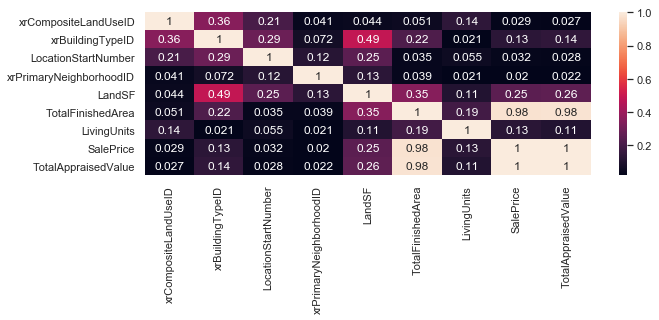

In [29]:
sns.set(rc={'figure.figsize':(10,3)})
sns.heatmap(cor, annot=True)

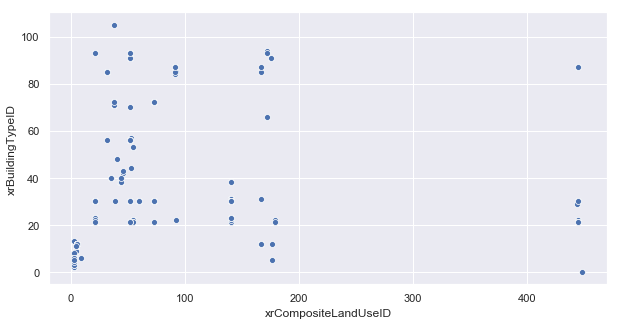

In [26]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot("xrCompositeLandUseID","xrBuildingTypeID",data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000295B46A7630>,
      dtype=object)

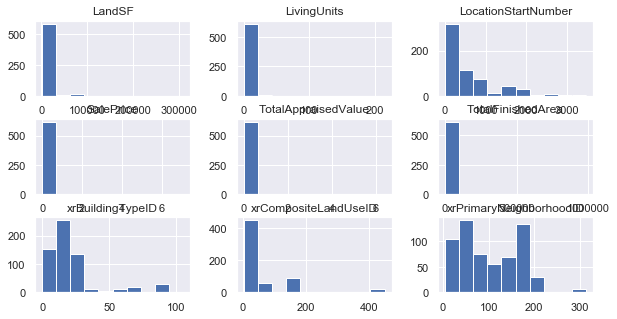

In [27]:
df.hist()

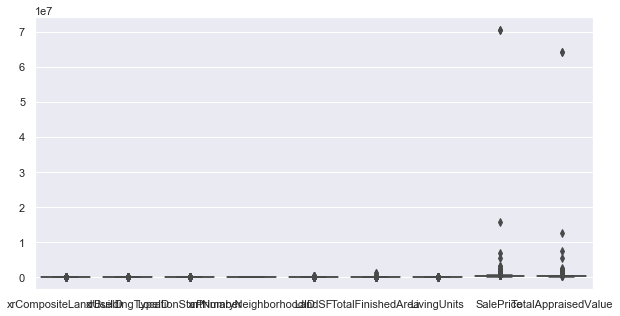

In [28]:
sns.boxplot(data = df)


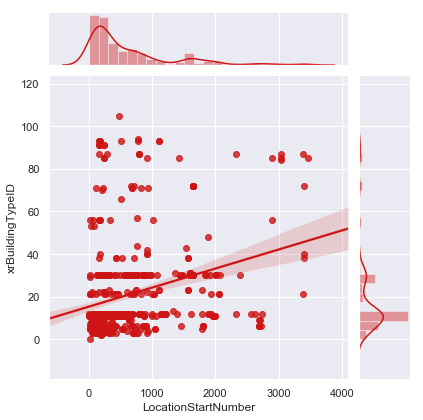

In [29]:
sns.jointplot(df.loc[:,'LocationStartNumber'], df.loc[:,'xrBuildingTypeID'], kind="regg", color="#ce1414")

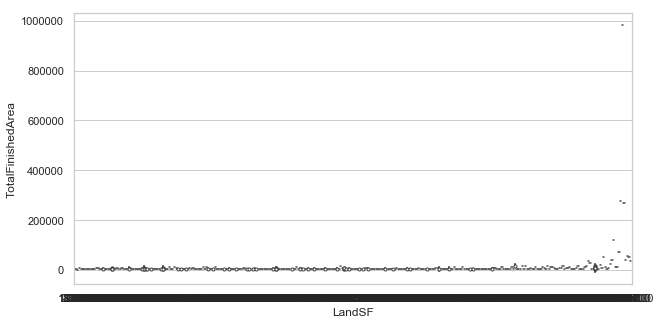

In [30]:
sns.set_style('whitegrid')
sns.violinplot(x = 'LandSF', y = 'TotalFinishedArea', data = df)

Bu kısımda kategorik ifadelerimize etiketleme işlemi yapacağız

In [31]:
df_2 = df.copy()
df_3 = df.copy()

In [32]:
df_2

,xrCompositeLandUseID,xrBuildingTypeID,LocationStartNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,LivingUnits,SalePrice,TotalAppraisedValue
37,5,12.0,142.0,PUTNAM ST,114,3700.0,3778.00000,3.0,77800,77800
179,3,6.0,356.0,FREEMAN ST,5,7301.0,1861.00000,1.0,169900,169900
184,3,3.0,324.0,FREEMAN ST,8,7650.0,1215.00000,1.0,139400,139400
185,3,6.0,332.0,FREEMAN ST,5,7650.0,2120.50000,1.0,182000,176800
188,3,3.0,324.0,FREEMAN ST,8,7650.0,1215.00000,1.0,139400,139400
253,3,5.0,167.0,HILLSIDE AVE,11,9000.0,1720.00000,1.0,141600,141600
254,3,5.0,167.0,HILLSIDE AVE,11,9000.0,1720.00000,1.0,141600,141600
255,3,5.0,167.0,HILLSIDE AVE,11,9000.0,1720.00000,1.0,75000,141600
287,3,5.0,311.0,HILLSIDE AVE,10,6000.0,1262.00000,1.0,70000,144200
288,5,12.0,347.0,HILLSIDE AVE,10,5960.0,3938.00000,3.0,207000,216600


In [33]:
df_2.columns

Index(['xrCompositeLandUseID', 'xrBuildingTypeID', 'LocationStartNumber',
       'StreetNameAndWay', 'xrPrimaryNeighborhoodID', 'LandSF',
       'TotalFinishedArea', 'LivingUnits', 'SalePrice', 'TotalAppraisedValue'],
      dtype='object')

Etiketleme İşlemi için sklearn içinde ki kütüphaneyi kullanacağız

In [34]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

transform işlemi yaparak etiketleme yapmış oluruz.

In [35]:
df_3["StreetNameAndWay"] = le.fit_transform(df_2.StreetNameAndWay)

etiketlediğimiz verilerin neler olduğuna bakarız.

In [36]:
le.classes_

array(['ALBANY AVE', 'ASYLUM AVE', 'BARBOUR ST', 'BENTON ST',
       'BLUE HILLS AVE', 'BROAD ST', 'BROOK ST', 'CAMPFIELD AVE',
       'CLEVELAND AVE', 'COLLINS ST', 'EDGEWOOD ST', 'ENFIELD ST',
       'EVERGREEN AVE', 'FRANKLIN AVE', 'FREEMAN ST', 'GARDEN ST',
       'GILLETT ST', 'HILLSIDE AVE', 'HUNTINGTON ST', 'LAUREL ST',
       'MAIN ST', 'MAPLE AVE', 'MARSHALL ST', 'MORRIS ST', 'PARK ST',
       'PRESTON ST', 'PUTNAM ST', 'TOWER AVE', 'WESTLAND ST',
       'WETHERSFIELD AVE', 'WILLARD ST', 'WOODLAND ST', 'WYLLYS ST',
       'ZION ST'], dtype=object)

Kütüphanemizi ekliyoruz

In [37]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection

Bağımlı ve Bağımsız değişkenleri ayırdık

In [38]:
X = df_3.drop(["SalePrice"], axis = 1)
y = df_3["SalePrice"]

Eğitim ve Test verisini ayırıyoruz.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 144)

In [40]:
xgb = XGBRegressor()

GridSearchCV Parametleri Oluşturuyoruz.

In [41]:
params = {"colsample_bytree":[0.4,0.5,0.6],
         "learning_rate":[0.01,0.02,0.09],
         "max_depth":[2,3,4,5,6],
         "n_estimators":[100,200,500,2000]}

In [42]:
grid = GridSearchCV(xgb, params, cv = 10, n_jobs = -1, verbose = 2)

In [43]:
#grid.fit(X_train, y_train)

En uygun parametreleri buluyoruz ve giriyoruz

In [44]:
#grid.best_params_

In [45]:
#xgb1 = XGBRegressor(colsample_bytree = 0.5, learning_rate = 0.09, max_depth = 4, n_estimators = 2000)
xgb1 = XGBRegressor(colsample_bytree = 0.6, learning_rate = 0.01, max_depth = 2, n_estimators = 1000)

Modelimizi eğitiyoruz

In [46]:
model_xgb = xgb1.fit(X_train, y_train)

Tahmin yapıyoruz
tahmin edilen ve gerçek verileri karşılaştırabiliriz

In [51]:
model_xgb.predict(X_test)[40:45]

array([5131318.5 ,  339247.8 ,  621181.44,  621181.44,  239166.23],
      dtype=float32)

In [52]:
y_test[40:45]

2024    1884700
764      175000
2385    1544800
2422    1544800
1861     338800
Name: SalePrice, dtype: int64

modelin skorunu hesapladık

In [49]:
model_xgb.score(X_test, y_test)

0.8166277166162104

In [50]:
model_xgb.score(X_train, y_train)

0.8562691318499766

valide edilmiş (doğrulanmış hata oranımızı buluyoruz)

In [130]:
np.sqrt(-1*(cross_val_score(model_xgb, X_test, y_test, cv=10, scoring='neg_mean_squared_error'))).mean()

92998.19803071363

model de parametrelerin önemini görüyoruz

In [131]:
importance = pd.DataFrame({"Importance": model_xgb.feature_importances_},
                         index=X_train.columns)

In [132]:
importance

,Importance
xrCompositeLandUseID,0.001273
xrBuildingTypeID,0.060907
LocationStartNumber,0.045246
StreetNameAndWay,0.000000
xrPrimaryNeighborhoodID,0.000777
LandSF,0.350098
TotalFinishedArea,0.297728
LivingUnits,0.180691
TotalAppraisedValue,0.063279
